# EDA

## 1. 데이터 불러오기

### 필수 라이브러리

In [18]:
import os
from pprint import pprint

import numpy as np
import pandas as pd
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from tqdm import tqdm

pd.set_option('display.max_columns', 100) # column 출력제한 해제

### 엑셀 파일을 읽는 함수

읽어오는 속도가 느린 엑셀 파일을 위해 csv 파일로 변환하여 저장해 두고 사용합니다.

In [20]:
def read_excel_file(file_path: str, header: int = None) -> pd.DataFrame:
    csv_file = file_path.replace(".xlsx", ".csv")

    if not os.path.exists(csv_file):
        print("Converting excel to csv...")
        if header:
            df = pd.read_excel(file_path, header=header)
        else:
            df = pd.read_excel(file_path)

        df.to_csv(csv_file, index=False)
        print(f"  {file_path} -> {csv_file}")
        return df
    else:
        print(f"  Reading {csv_file}")
        return pd.read_csv(csv_file, low_memory=False)

### 엑셀 파일들 읽어오기

In [21]:
ROOT_DIR = "../data"
RANDOM_STATE = 110

X_Dam = read_excel_file(os.path.join(ROOT_DIR, "Dam dispensing.xlsx"), header=1)

X_AutoClave = read_excel_file(
    os.path.join(ROOT_DIR, "Auto clave.xlsx"), header=1
)

X_Fill1 = read_excel_file(
    os.path.join(ROOT_DIR, "Fill1 dispensing.xlsx"), header=1
)

X_Fill2 = read_excel_file(
    os.path.join(ROOT_DIR, "Fill2 dispensing.xlsx"), header=1
)

y = pd.read_csv(os.path.join(ROOT_DIR, "train_y.csv"))

  Reading ../data\Dam dispensing.csv
  Reading ../data\Auto clave.csv
  Reading ../data\Fill1 dispensing.csv
  Reading ../data\Fill2 dispensing.csv


### 데이터 병합

x 데이터 병합

In [22]:
# Rename columns
X_Dam.columns = [i + " - Dam" for i in X_Dam.columns]
X_AutoClave.columns = [i + " - AutoClave" for i in X_AutoClave.columns]
X_Fill1.columns = [i + " - Fill1" for i in X_Fill1.columns]
X_Fill2.columns = [i + " - Fill2" for i in X_Fill2.columns]
X_Dam = X_Dam.rename(columns={"Set ID - Dam": "Set ID"})
X_AutoClave = X_AutoClave.rename(columns={"Set ID - AutoClave": "Set ID"})
X_Fill1 = X_Fill1.rename(columns={"Set ID - Fill1": "Set ID"})
X_Fill2 = X_Fill2.rename(columns={"Set ID - Fill2": "Set ID"})

# Merge X
X = pd.merge(X_Dam, X_AutoClave, on="Set ID")
X = pd.merge(X, X_Fill1, on="Set ID")
X = pd.merge(X, X_Fill2, on="Set ID")
X = X.drop(X[X.duplicated(subset="Set ID")].index).reset_index(drop=True)
X

,Wip Line - Dam,Process Desc. - Dam,Equipment - Dam,Model.Suffix - Dam,Workorder - Dam,LOT ID - Dam,Set ID,Box ID - Dam,Collect Date - Dam,Insp. Seq No. - Dam,Insp Judge Code - Dam,Collect Result - Dam,Unit Time - Dam,Judge Value - Dam,Collect Result.1 - Dam,Unit Time.1 - Dam,Judge Value.1 - Dam,Collect Result.2 - Dam,Unit Time.2 - Dam,Judge Value.2 - Dam,Collect Result.3 - Dam,Unit Time.3 - Dam,Judge Value.3 - Dam,Collect Result.4 - Dam,Unit Time.4 - Dam,Judge Value.4 - Dam,Collect Result.5 - Dam,Unit Time.5 - Dam,Judge Value.5 - Dam,Collect Result.6 - Dam,Unit Time.6 - Dam,Judge Value.6 - Dam,Collect Result.7 - Dam,Unit Time.7 - Dam,Judge Value.7 - Dam,Collect Result.8 - Dam,Unit Time.8 - Dam,Judge Value.8 - Dam,Collect Result.9 - Dam,Unit Time.9 - Dam,Judge Value.9 - Dam,Collect Result.10 - Dam,Unit Time.10 - Dam,Judge Value.10 - Dam,Collect Result.11 - Dam,Unit Time.11 - Dam,Judge Value.11 - Dam,Collect Result.12 - Dam,Unit Time.12 - Dam,Judge Value.12 - Dam,...,Judge Value.23 - Fill2,Collect Result.24 - Fill2,Unit Time.24 - Fill2,Judge Value.24 - Fill2,Collect Result.25 - Fill2,Unit Time.25 - Fill2,Judge Value.25 - Fill2,Collect Result.26 - Fill2,Unit Time.26 - Fill2,Judge Value.26 - Fill2,Collect Result.27 - Fill2,Unit Time.27 - Fill2,Judge Value.27 - Fill2,Collect Result.28 - Fill2,Unit Time.28 - Fill2,Judge Value.28 - Fill2,Collect Result.29 - Fill2,Unit Time.29 - Fill2,Judge Value.29 - Fill2,Collect Result.30 - Fill2,Unit Time.30 - Fill2,Judge Value.30 - Fill2,Collect Result.31 - Fill2,Unit Time.31 - Fill2,Judge Value.31 - Fill2,Collect Result.32 - Fill2,Unit Time.32 - Fill2,Judge Value.32 - Fill2,Collect Result.33 - Fill2,Unit Time.33 - Fill2,Judge Value.33 - Fill2,Collect Result.34 - Fill2,Unit Time.34 - Fill2,Judge Value.34 - Fill2,Collect Result.35 - Fill2,Unit Time.35 - Fill2,Judge Value.35 - Fill2,Collect Result.36 - Fill2,Unit Time.36 - Fill2,Judge Value.36 - Fill2,Collect Result.37 - Fill2,Unit Time.37 - Fill2,Judge Value.37 - Fill2,Collect Result.38 - Fill2,Unit Time.38 - Fill2,Judge Value.38 - Fill2,Collect Result.39 - Fill2,Unit Time.39 - Fill2,Judge Value.39 - Fill2,Unnamed: 131 - Fill2
0,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3F1X5847-2,OP753345013050000002,OP753345013050000002,NaN,2023-05-04 08:57:23,1,OK,240.0,NaN,NaN,2.5,NaN,NaN,-90,NaN,NaN,70,NaN,NaN,1150,NaN,NaN,33.5,NaN,NaN,0,NaN,NaN,1030,NaN,NaN,33.5,NaN,NaN,-90,NaN,NaN,10,NaN,NaN,11.6,NaN,NaN,3.9,NaN,NaN,...,NaN,243.7,NaN,NaN,243.7,NaN,NaN,270.0,NaN,NaN,50,NaN,NaN,-10,NaN,NaN,119,NaN,NaN,50,NaN,NaN,91.8,NaN,NaN,270.0,NaN,NaN,50,NaN,NaN,85,NaN,NaN,17.800,NaN,NaN,7.0,NaN,NaN,1,NaN,NaN,1,NaN,NaN,0,NaN,NaN,NaN
1,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3F1X5847-2,OP753345013050000003,OP753345013050000003,NaN,2023-05-04 09:11:35,1,OK,240.0,NaN,NaN,2.5,NaN,NaN,-90,NaN,NaN,70,NaN,NaN,1150,NaN,NaN,33.5,NaN,NaN,0,NaN,NaN,1030,NaN,NaN,33.5,NaN,NaN,-90,NaN,NaN,10,NaN,NaN,11.6,NaN,NaN,3.9,NaN,NaN,...,NaN,243.7,NaN,NaN,243.7,NaN,NaN,270.0,NaN,NaN,50,NaN,NaN,-10,NaN,NaN,119,NaN,NaN,50,NaN,NaN,91.8,NaN,NaN,270.0,NaN,NaN,50,NaN,NaN,85,NaN,NaN,18.200,NaN,NaN,5.0,NaN,NaN,2,NaN,NaN,1,NaN,NaN,0,NaN,NaN,NaN
2,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3F1X5847-2,OP753345013050000004,OP753345013050000004,NaN,2023-05-04 09:13:19,1,OK,240.0,NaN,NaN,2.5,NaN,NaN,-90,NaN,NaN,70,NaN,NaN,1150,NaN,NaN,33.5,NaN,NaN,0,NaN,NaN,1030,NaN,NaN,33.5,NaN,NaN,-90,NaN,NaN,10,NaN,NaN,11.6,NaN,NaN,3.9,NaN,NaN,...,NaN,243.7,NaN,NaN,243.7,NaN,NaN,270.0,NaN,NaN,50,NaN,NaN,-10,NaN,NaN,119,NaN,NaN,50,NaN,NaN,91.8,NaN,NaN,270.0,NaN,NaN,50,NaN,NaN,85,NaN,NaN,18.400,NaN,NaN,6.0,NaN,NaN,3,NaN,NaN,1,NaN,NaN,0,NaN,NaN,NaN
3,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3F1X5847-2,OP753345013050000005,OP753345013050000005,NaN,2023-05-04 09:15:24,1,OK,240.0,NaN,NaN,2.5,NaN,NaN,-90,NaN,NaN,70,NaN,NaN,1150,NaN,NaN,33.5,NaN,NaN,0,NaN,NaN,1030,NaN,NaN,33.5,NaN,NaN,-90,NaN,NaN,10,NaN,NaN,11.6,NaN,NaN,3.9,NaN,NaN,...,NaN,243.7,NaN,NaN,243.7,NaN,NaN,270.0,NaN,NaN,50,NaN,NaN,

x 데이터와 y 데이터 병합

In [23]:
# Merge X and y
df_merged = pd.merge(X, y, "inner", on="Set ID")

# Drop columns with more than half of the values missing
drop_cols = []
for column in df_merged.columns:
    if (df_merged[column].notnull().sum() // 2) < df_merged[
        column
    ].isnull().sum():
        drop_cols.append(column)
df_merged = df_merged.drop(drop_cols, axis=1)

# Drop Lot ID
df_merged = df_merged.drop("LOT ID - Dam", axis=1)
df_merged

,Wip Line - Dam,Process Desc. - Dam,Equipment - Dam,Model.Suffix - Dam,Workorder - Dam,Set ID,Collect Date - Dam,Insp. Seq No. - Dam,Insp Judge Code - Dam,Collect Result - Dam,Collect Result.1 - Dam,Collect Result.2 - Dam,Collect Result.3 - Dam,Collect Result.4 - Dam,Collect Result.5 - Dam,Collect Result.6 - Dam,Collect Result.7 - Dam,Collect Result.8 - Dam,Collect Result.9 - Dam,Collect Result.10 - Dam,Collect Result.11 - Dam,Collect Result.12 - Dam,Collect Result.13 - Dam,Collect Result.14 - Dam,Collect Result.15 - Dam,Collect Result.16 - Dam,Collect Result.17 - Dam,Collect Result.18 - Dam,Collect Result.19 - Dam,Collect Result.20 - Dam,Collect Result.21 - Dam,Collect Result.22 - Dam,Collect Result.23 - Dam,Collect Result.24 - Dam,Collect Result.25 - Dam,Collect Result.26 - Dam,Collect Result.27 - Dam,Collect Result.28 - Dam,Collect Result.29 - Dam,Collect Result.30 - Dam,Collect Result.31 - Dam,Collect Result.32 - Dam,Collect Result.33 - Dam,Collect Result.34 - Dam,Collect Result.35 - Dam,Collect Result.36 - Dam,Collect Result.37 - Dam,Collect Result.38 - Dam,Collect Result.39 - Dam,Collect Result.40 - Dam,...,Wip Line - Fill2,Process Desc. - Fill2,Equipment - Fill2,Model.Suffix - Fill2,Workorder - Fill2,LOT ID - Fill2,Collect Date - Fill2,Insp. Seq No. - Fill2,Insp Judge Code - Fill2,Collect Result - Fill2,Collect Result.1 - Fill2,Collect Result.2 - Fill2,Collect Result.3 - Fill2,Collect Result.4 - Fill2,Collect Result.5 - Fill2,Collect Result.6 - Fill2,Collect Result.7 - Fill2,Collect Result.8 - Fill2,Collect Result.9 - Fill2,Collect Result.10 - Fill2,Collect Result.11 - Fill2,Collect Result.12 - Fill2,Collect Result.13 - Fill2,Collect Result.14 - Fill2,Collect Result.15 - Fill2,Collect Result.16 - Fill2,Collect Result.17 - Fill2,Collect Result.18 - Fill2,Collect Result.19 - Fill2,Collect Result.20 - Fill2,Collect Result.21 - Fill2,Collect Result.22 - Fill2,Collect Result.23 - Fill2,Collect Result.24 - Fill2,Collect Result.25 - Fill2,Collect Result.26 - Fill2,Collect Result.27 - Fill2,Collect Result.28 - Fill2,Collect Result.29 - Fill2,Collect Result.30 - Fill2,Collect Result.31 - Fill2,Collect Result.32 - Fill2,Collect Result.33 - Fill2,Collect Result.34 - Fill2,Collect Result.35 - Fill2,Collect Result.36 - Fill2,Collect Result.37 - Fill2,Collect Result.38 - Fill2,Collect Result.39 - Fill2,target
0,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3F1X5847-2,OP753345013050000003,2023-05-04 09:11:35,1,OK,240.0,2.5,-90,70,1150,33.5,0,1030,33.5,-90,10,11.6,3.9,11.6,0.81,0.27,0.81,549,463.0,160.5,377.5,377.0,377.5,284.8,284.80,284.80,257.00,66,0,127.5,66.0,124.5,257.0,66,124.5,505.00,303.5,265.0,91.2,5.0,2,...,IVI-OB6,Fill2 Dispenser,Fill2 dispenser #1,AJX75334501,3F1X5847-2,OP753345013050000003,2023-05-04 09:15:00,1,OK,240,32,-90,55,1020,32,0,1020,32,90,0,0,0.0,0,0,0.0,0,835.5,458.0,156.0,428.0,427.9,428.0,243.7,243.7,243.7,270.0,50,-10,119,50,91.8,270.0,50,85,18.200,5.0,2,1,0,AbNormal
1,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3F1X5847-2,OP753345013050000004,2023-05-04 09:13:19,1,OK,240.0,2.5,-90,70,1150,33.5,0,1030,33.5,-90,10,11.6,3.9,11.6,0.81,0.27,0.81,549,463.0,160.5,377.5,377.0,377.5,284.8,284.80,284.80,257.00,66,0,127.5,66.0,124.5,257.0,66,124.5,505.00,303.5,265.0,91.2,6.0,3,...,IVI-OB6,Fill2 Dispenser,Fill2 dispenser #1,AJX75334501,3F1X5847-2,OP753345013050000004,2023-05-04 09:17:04,1,OK,240,32,-90,55,1020,32,0,1020,32,90,0,0,0.0,0,0,0.0,0,835.5,458.0,156.0,428.0,427.9,428.0,243.7,243.7,243.7,270.0,50,-10,119,50,91.8,270.0,50,85,18.400,6.0,3,1,0,AbNormal
2,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3F1X5847-2,OP753345013050000007,2023-05-04 09:19:31,1,OK,240.0,2.5,-90,70,1150,33.5,0,1030,33.5,-90,10,11.6,3.9,11.6,0.81,0.27,0.81,549,463.0,160.5,377.5,377.0,377.5,284.8,284.80,284.80,257.00,66,0,127.5,66.0,124.5,257.0,66,124.5,505.00,303.5,265.0,91.3,1.0,6,...,IVI-OB6,Fill2 Dispenser,Fill2 dispenser #1,AJX75334501,3F1X5847-2,OP753345013050000007,2023-05-04 09:24:39,1,OK,240,32,-90,55,1020,32,0,1020,

In [25]:
import matplotlib.pyplot as plt

In [26]:
df_merged.isna().sum()

Wip Line - Dam               0
Process Desc. - Dam          0
Equipment - Dam              0
Model.Suffix - Dam           0
Workorder - Dam              0
                            ..
Collect Result.36 - Fill2    0
Collect Result.37 - Fill2    0
Collect Result.38 - Fill2    0
Collect Result.39 - Fill2    0
target                       0
Length: 189, dtype: int64

In [27]:
missing_values = df_merged.isna().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

Collect Result.17 - Dam      12766
Collect Result.7 - Fill1     12766
Collect Result.17 - Fill2    12766
dtype: int64


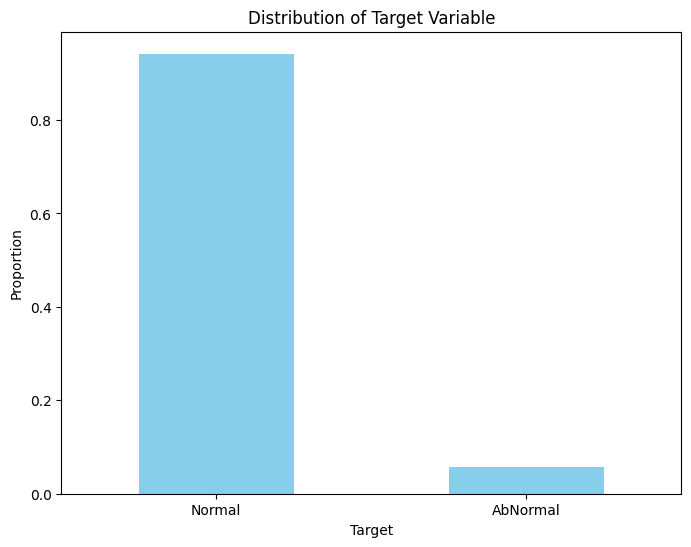

In [28]:
# Visualizing the distribution of the 'target' column
target_distribution = df_merged['target'].value_counts(normalize=True)

# Plotting the distribution
plt.figure(figsize=(8, 6))
target_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()

In [29]:
numeric_columns = df_merged.select_dtypes(include=[np.number])
numeric_columns

,Insp. Seq No. - Dam,Collect Result - Dam,Collect Result.1 - Dam,Collect Result.2 - Dam,Collect Result.3 - Dam,Collect Result.4 - Dam,Collect Result.5 - Dam,Collect Result.6 - Dam,Collect Result.7 - Dam,Collect Result.8 - Dam,Collect Result.9 - Dam,Collect Result.10 - Dam,Collect Result.11 - Dam,Collect Result.12 - Dam,Collect Result.13 - Dam,Collect Result.14 - Dam,Collect Result.15 - Dam,Collect Result.16 - Dam,Collect Result.18 - Dam,Collect Result.19 - Dam,Collect Result.20 - Dam,Collect Result.21 - Dam,Collect Result.22 - Dam,Collect Result.23 - Dam,Collect Result.24 - Dam,Collect Result.25 - Dam,Collect Result.26 - Dam,Collect Result.27 - Dam,Collect Result.28 - Dam,Collect Result.29 - Dam,Collect Result.30 - Dam,Collect Result.31 - Dam,Collect Result.32 - Dam,Collect Result.33 - Dam,Collect Result.34 - Dam,Collect Result.35 - Dam,Collect Result.36 - Dam,Collect Result.37 - Dam,Collect Result.38 - Dam,Collect Result.39 - Dam,Collect Result.40 - Dam,Collect Result.41 - Dam,Collect Result.42 - Dam,Collect Result.43 - Dam,Collect Result.44 - Dam,Collect Result.45 - Dam,Collect Result.46 - Dam,Collect Result.47 - Dam,Collect Result.48 - Dam,Collect Result.49 - Dam,...,Collect Result.20 - Fill1,Collect Result.21 - Fill1,Collect Result.22 - Fill1,Collect Result.23 - Fill1,Collect Result.24 - Fill1,Collect Result.25 - Fill1,Collect Result.26 - Fill1,Collect Result.27 - Fill1,Collect Result.28 - Fill1,Collect Result.29 - Fill1,Insp. Seq No. - Fill2,Collect Result - Fill2,Collect Result.1 - Fill2,Collect Result.2 - Fill2,Collect Result.3 - Fill2,Collect Result.4 - Fill2,Collect Result.5 - Fill2,Collect Result.6 - Fill2,Collect Result.7 - Fill2,Collect Result.8 - Fill2,Collect Result.9 - Fill2,Collect Result.10 - Fill2,Collect Result.11 - Fill2,Collect Result.12 - Fill2,Collect Result.13 - Fill2,Collect Result.14 - Fill2,Collect Result.15 - Fill2,Collect Result.16 - Fill2,Collect Result.18 - Fill2,Collect Result.19 - Fill2,Collect Result.20 - Fill2,Collect Result.21 - Fill2,Collect Result.22 - Fill2,Collect Result.23 - Fill2,Collect Result.24 - Fill2,Collect Result.25 - Fill2,Collect Result.26 - Fill2,Collect Result.27 - Fill2,Collect Result.28 - Fill2,Collect Result.29 - Fill2,Collect Result.30 - Fill2,Collect Result.31 - Fill2,Collect Result.32 - Fill2,Collect Result.33 - Fill2,Collect Result.34 - Fill2,Collect Result.35 - Fill2,Collect Result.36 - Fill2,Collect Result.37 - Fill2,Collect Result.38 - Fill2,Collect Result.39 - Fill2
0,1,240.0,2.5,-90,70,1150,33.5,0,1030,33.5,-90,10,11.6,3.9,11.6,0.81,0.27,0.81,463.0,160.5,377.5,377.0,377.5,284.8,284.80,284.80,257.00,66,0,127.5,66.0,124.5,257.0,66,124.5,505.00,303.5,265.0,91.2,5.0,2,1,9000,9000,9000,9000,7000,9000,7000,9000,...,50.0,92.2,289.0,50,85,110.9,5.0,2,1,7,1,240,32,-90,55,1020,32,0,1020,32,90,0,0,0.0,0,0,0.0,0,458.0,156.0,428.0,427.9,428.0,243.7,243.7,243.7,270.0,50,-10,119,50,91.8,270.0,50,85,18.200,5.0,2,1,0
1,1,240.0,2.5,-90,70,1150,33.5,0,1030,33.5,-90,10,11.6,3.9,11.6,0.81,0.27,0.81,463.0,160.5,377.5,377.0,377.5,284.8,284.80,284.80,257.00,66,0,127.5,66.0,124.5,257.0,66,124.5,505.00,303.5,265.0,91.2,6.0,3,1,9000,9000,9000,9000,7000,9000,7000,9000,...,50.0,92.2,289.0,50,85,111.0,6.0,3,1,7,1,240,32,-90,55,1020,32,0,1020,32,90,0,0,0.0,0,0,0.0,0,458.0,156.0,428.0,427.9,428.0,243.7,243.7,243.7,270.0,50,-10,119,50,91.8,270.0,50,85,18.400,6.0,3,1,0
2,1,240.0,2.5,-90,70,1150,33.5,0,1030,33.5,-90,10,11.6,3.9,11.6,0.81,0.27,0.81,463.0,160.5,377.5,377.0,377.5,284.8,284.80,284.80,257.00,66,0,127.5,66.0,124.5,257.0,66,124.5,505.00,303.5,265.0,91.3,1.0,6,1,9000,9000,9000,9000,7000,9000,7000,9000,...,50.0,92.2,289.0,50,85,111.1,1.0,6,1,7,1,240,32,-90,55,1020,32,0,1020,32,90,0,0,0.0,0,0,0.0,0,458.0,156.0,428.0,427.9,428.0,243.7,243.7,243.7,270.0,50,-10,119,50,91.8,270.0,50,85,18.600,1.0,6,1,0
3,1,240.0,2.5,-90,70,1150,33.5,0,1030,33.5,-90,10,11.6,3.9,11.5,0.81,0.27,0.80,463.0,160.5,377.5,377.0,377.5,284.8,284.80,284.80,257.00,66,0,127.5,66.0,124.5,257.0,66,124.5,505.00,303.5,265.0,91.

In [30]:
categorical_columns = df_merged.select_dtypes(include=['object', 'category'])
categorical_columns

,Wip Line - Dam,Process Desc. - Dam,Equipment - Dam,Model.Suffix - Dam,Workorder - Dam,Set ID,Collect Date - Dam,Insp Judge Code - Dam,Collect Result.17 - Dam,Wip Line - AutoClave,Process Desc. - AutoClave,Equipment - AutoClave,Model.Suffix - AutoClave,Workorder - AutoClave,LOT ID - AutoClave,Collect Date - AutoClave,Insp Judge Code - AutoClave,Judge Value - AutoClave,Judge Value.1 - AutoClave,Judge Value.2 - AutoClave,Judge Value.3 - AutoClave,Wip Line - Fill1,Process Desc. - Fill1,Equipment - Fill1,Model.Suffix - Fill1,Workorder - Fill1,LOT ID - Fill1,Collect Date - Fill1,Insp Judge Code - Fill1,Collect Result.7 - Fill1,Wip Line - Fill2,Process Desc. - Fill2,Equipment - Fill2,Model.Suffix - Fill2,Workorder - Fill2,LOT ID - Fill2,Collect Date - Fill2,Insp Judge Code - Fill2,Collect Result.17 - Fill2,target
0,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3F1X5847-2,OP753345013050000003,2023-05-04 09:11:35,OK,549,IVI-OB6,Auto Clave Out,Auto Clave Out,AJX75334501,3F1X5847-2,OP753345013050000003,2023-05-04 09:49:12,OK,OK,OK,OK,OK,IVI-OB6,Fill1 Dispenser,Fill1 dispenser #1,AJX75334501,3F1X5847-2,OP753345013050000003,2023-05-04 09:13:39,OK,838.2,IVI-OB6,Fill2 Dispenser,Fill2 dispenser #1,AJX75334501,3F1X5847-2,OP753345013050000003,2023-05-04 09:15:00,OK,835.5,AbNormal
1,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3F1X5847-2,OP753345013050000004,2023-05-04 09:13:19,OK,549,IVI-OB6,Auto Clave Out,Auto Clave Out,AJX75334501,3F1X5847-2,OP753345013050000004,2023-05-04 09:49:12,OK,OK,OK,OK,OK,IVI-OB6,Fill1 Dispenser,Fill1 dispenser #1,AJX75334501,3F1X5847-2,OP753345013050000004,2023-05-04 09:15:42,OK,838.2,IVI-OB6,Fill2 Dispenser,Fill2 dispenser #1,AJX75334501,3F1X5847-2,OP753345013050000004,2023-05-04 09:17:04,OK,835.5,AbNormal
2,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3F1X5847-2,OP753345013050000007,2023-05-04 09:19:31,OK,549,IVI-OB6,Auto Clave Out,Auto Clave Out,AJX75334501,3F1X5847-2,OP753345013050000007,2023-05-04 10:03:02,OK,OK,OK,OK,OK,IVI-OB6,Fill1 Dispenser,Fill1 dispenser #1,AJX75334501,3F1X5847-2,OP753345013050000007,2023-05-04 09:21:54,OK,838.2,IVI-OB6,Fill2 Dispenser,Fill2 dispenser #1,AJX75334501,3F1X5847-2,OP753345013050000007,2023-05-04 09:24:39,OK,835.5,AbNormal
3,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3F1X5847-2,OP753345013050000011,2023-05-04 11:19:55,OK,549,IVI-OB6,Auto Clave Out,Auto Clave Out,AJX75334501,3F1X5847-2,OP753345013050000011,2023-05-04 11:50:09,OK,OK,OK,OK,NG,IVI-OB6,Fill1 Dispenser,Fill1 dispenser #1,AJX75334501,3F1X5847-2,OP753345013050000011,2023-05-04 11:22:00,OK,838.2,IVI-OB6,Fill2 Dispenser,Fill2 dispenser #1,AJX75334501,3F1X5847-2,OP753345013050000011,2023-05-04 11:23:21,OK,835.5,AbNormal
4,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3F1X5847-2,OP753345013050000024,2023-05-05 09:35:48,OK,549,IVI-OB6,Auto Clave Out,Auto Clave Out,AJX75334501,3F1X5847-2,OP753345013050000024,2023-05-05 10:10:23,OK,OK,OK,OK,OK,IVI-OB6,Fill1 Dispenser,Fill1 dispenser #1,AJX75334501,3F1X5847-2,OP753345013050000024,2023-05-05 09:36:57,OK,838.2,IVI-OB6,Fill2 Dispenser,Fill2 dispenser #1,AJX75334501,3F1X5847-2,OP753345013050000024,2023-05-05 09:38:18,OK,835.5,AbNormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40501,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,4F1XB738-1,OP753345054040002680,2024-04-28 18:25:20,OK,NaN,IVI-OB6,Auto Clave Out,Auto Clave Out,AJX75334505,4F1XB738-1,OP753345054040002680,2024-04-28 19:02:18,OK,OK,OK,OK,OK,IVI-OB6,Fill1 Dispenser,Fill1 dispenser #1,AJX75334505,4F1XB738-1,OP753345054040002680,2024-04-28 18:27:10,OK,NaN,IVI-OB6,Fill2 Dispenser,Fill2 dispenser #1,AJX75334505,4F1XB738-1,OP753345054040002680,2024-04-28 18:28:19,OK,NaN,Normal
40502,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334505,4F1XB738-1,OP753345054040002681,2024-04-28 18:26:27,OK,NaN,IVI-OB6,Auto Clave Out,Auto Clave Out,AJX75334505,4F1XB738-1,OP753345054040002681,2

In [31]:
categorical_columns.nunique()

Wip Line - Dam                     1
Process Desc. - Dam                1
Equipment - Dam                    2
Model.Suffix - Dam                 7
Workorder - Dam                  663
Set ID                         40506
Collect Date - Dam             40506
Insp Judge Code - Dam              1
Collect Result.17 - Dam            7
Wip Line - AutoClave               1
Process Desc. - AutoClave          1
Equipment - AutoClave              1
Model.Suffix - AutoClave           7
Workorder - AutoClave            663
LOT ID - AutoClave             40506
Collect Date - AutoClave        8086
Insp Judge Code - AutoClave        1
Judge Value - AutoClave            1
Judge Value.1 - AutoClave          1
Judge Value.2 - AutoClave          1
Judge Value.3 - AutoClave          2
Wip Line - Fill1                   1
Process Desc. - Fill1              1
Equipment - Fill1                  2
Model.Suffix - Fill1               7
Workorder - Fill1                663
LOT ID - Fill1                 40506
C

In [32]:
unique_counts = categorical_columns.nunique()

filtered_columns = unique_counts[(unique_counts < 10) & (unique_counts > 1)].index
# Create a new DataFrame with the filtered categorical columns
filtered_categorical_df = categorical_columns[filtered_columns]

In [33]:
filtered_categorical_df

,Equipment - Dam,Model.Suffix - Dam,Collect Result.17 - Dam,Model.Suffix - AutoClave,Judge Value.3 - AutoClave,Equipment - Fill1,Model.Suffix - Fill1,Collect Result.7 - Fill1,Equipment - Fill2,Model.Suffix - Fill2,Collect Result.17 - Fill2,target
0,Dam dispenser #1,AJX75334501,549,AJX75334501,OK,Fill1 dispenser #1,AJX75334501,838.2,Fill2 dispenser #1,AJX75334501,835.5,AbNormal
1,Dam dispenser #1,AJX75334501,549,AJX75334501,OK,Fill1 dispenser #1,AJX75334501,838.2,Fill2 dispenser #1,AJX75334501,835.5,AbNormal
2,Dam dispenser #1,AJX75334501,549,AJX75334501,OK,Fill1 dispenser #1,AJX75334501,838.2,Fill2 dispenser #1,AJX75334501,835.5,AbNormal
3,Dam dispenser #1,AJX75334501,549,AJX75334501,NG,Fill1 dispenser #1,AJX75334501,838.2,Fill2 dispenser #1,AJX75334501,835.5,AbNormal
4,Dam dispenser #1,AJX75334501,549,AJX75334501,OK,Fill1 dispenser #1,AJX75334501,838.2,Fill2 dispenser #1,AJX75334501,835.5,AbNormal
...,...,...,...,...,...,...,...,...,...,...,...,...
40501,Dam dispenser #1,AJX75334505,NaN,AJX75334505,OK,Fill1 dispenser #1,AJX75334505,NaN,Fill2 dispenser #1,AJX75334505,NaN,Normal
40502,Dam dispenser #2,AJX75334505,NaN,AJX75334505,OK,Fill1 dispenser #2,AJX75334505,NaN,Fill2 dispenser #2,AJX75334505,NaN,Normal
40503,Dam dispenser #1,AJX75334505,NaN,AJX75334505,OK,Fill1 dispenser #1,AJX75334505,NaN,Fill2 dispenser #1,AJX75334505,NaN,Normal
40504,Dam dispenser #1,AJX75334505,NaN,AJX75334505,OK,Fill1 dispenser #1,AJX75334505,NaN,Fill2 dispenser #1,AJX75334505,NaN,Normal


In [34]:
filtered_categorical_df.isna().sum()

Equipment - Dam                  0
Model.Suffix - Dam               0
Collect Result.17 - Dam      12766
Model.Suffix - AutoClave         0
Judge Value.3 - AutoClave        0
Equipment - Fill1                0
Model.Suffix - Fill1             0
Collect Result.7 - Fill1     12766
Equipment - Fill2                0
Model.Suffix - Fill2             0
Collect Result.17 - Fill2    12766
target                           0
dtype: int64

In [35]:
filtered_categorical_df.nunique()

Equipment - Dam              2
Model.Suffix - Dam           7
Collect Result.17 - Dam      7
Model.Suffix - AutoClave     7
Judge Value.3 - AutoClave    2
Equipment - Fill1            2
Model.Suffix - Fill1         7
Collect Result.7 - Fill1     6
Equipment - Fill2            2
Model.Suffix - Fill2         7
Collect Result.17 - Fill2    3
target                       2
dtype: int64

In [36]:
# Check if the values in the specified columns are the same in each row
columns_to_check = ['Model.Suffix - Dam', 'Model.Suffix - AutoClave', 'Model.Suffix - Fill1', 'Model.Suffix - Fill2']
filtered_categorical_df['All_Equal'] = filtered_categorical_df[columns_to_check].nunique(axis=1) == 1

filtered_categorical_df[['Model.Suffix - Dam', 'Model.Suffix - AutoClave', 'Model.Suffix - Fill1', 'Model.Suffix - Fill2', 'All_Equal']]

C:\Users\qh123\AppData\Local\Temp\ipykernel_7484\1242181407.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_categorical_df['All_Equal'] = filtered_categorical_df[columns_to_check].nunique(axis=1) == 1


,Model.Suffix - Dam,Model.Suffix - AutoClave,Model.Suffix - Fill1,Model.Suffix - Fill2,All_Equal
0,AJX75334501,AJX75334501,AJX75334501,AJX75334501,True
1,AJX75334501,AJX75334501,AJX75334501,AJX75334501,True
2,AJX75334501,AJX75334501,AJX75334501,AJX75334501,True
3,AJX75334501,AJX75334501,AJX75334501,AJX75334501,True
4,AJX75334501,AJX75334501,AJX75334501,AJX75334501,True
...,...,...,...,...,...
40501,AJX75334505,AJX75334505,AJX75334505,AJX75334505,True
40502,AJX75334505,AJX75334505,AJX75334505,AJX75334505,True
40503,AJX75334505,AJX75334505,AJX75334505,AJX75334505,True
40504,AJX75334505,AJX75334505,AJX75334505,AJX75334505,True


In [37]:
filtered_categorical_df[filtered_categorical_df['All_Equal'] == False]

,Equipment - Dam,Model.Suffix - Dam,Collect Result.17 - Dam,Model.Suffix - AutoClave,Judge Value.3 - AutoClave,Equipment - Fill1,Model.Suffix - Fill1,Collect Result.7 - Fill1,Equipment - Fill2,Model.Suffix - Fill2,Collect Result.17 - Fill2,target,All_Equal


In [46]:
#filtered_categorical_df = filtered_categorical_df.drop(columns=columns_to_check + ['All_Equal'])

In [40]:
filtered_categorical_df['Equipment - Fill1'].unique()

array(['Fill1 dispenser #1', 'Fill1 dispenser #2'], dtype=object)

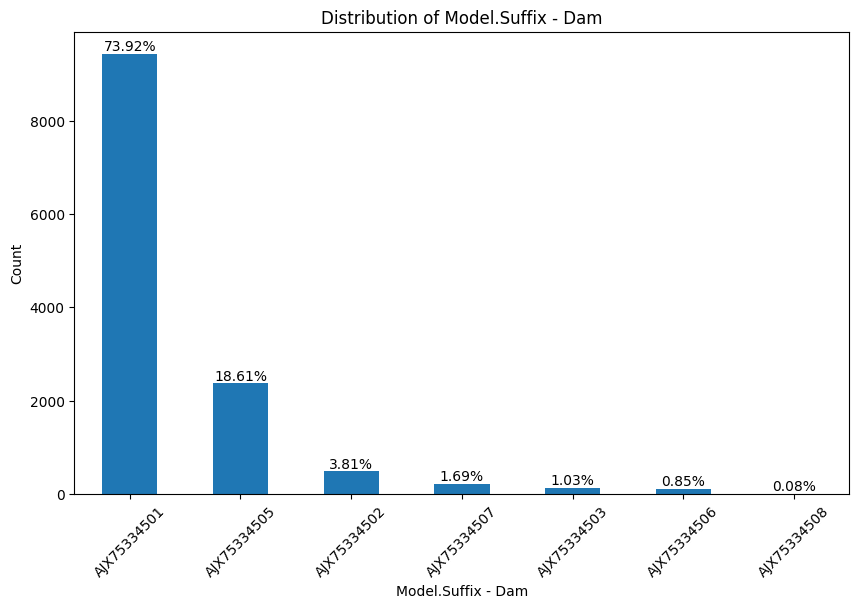

In [43]:
tmp_df = filtered_categorical_df[filtered_categorical_df.isnull().any(axis=1)]
model_suffix_dam_counts = tmp_df['Model.Suffix - Dam'].value_counts()

plt.figure(figsize=(10, 6))
ax = model_suffix_dam_counts.plot(kind='bar')
plt.title('Distribution of Model.Suffix - Dam')
plt.xlabel('Model.Suffix - Dam')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add ratio labels to each bar
total = model_suffix_dam_counts.sum()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total:.2%}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom')
    
plt.show()

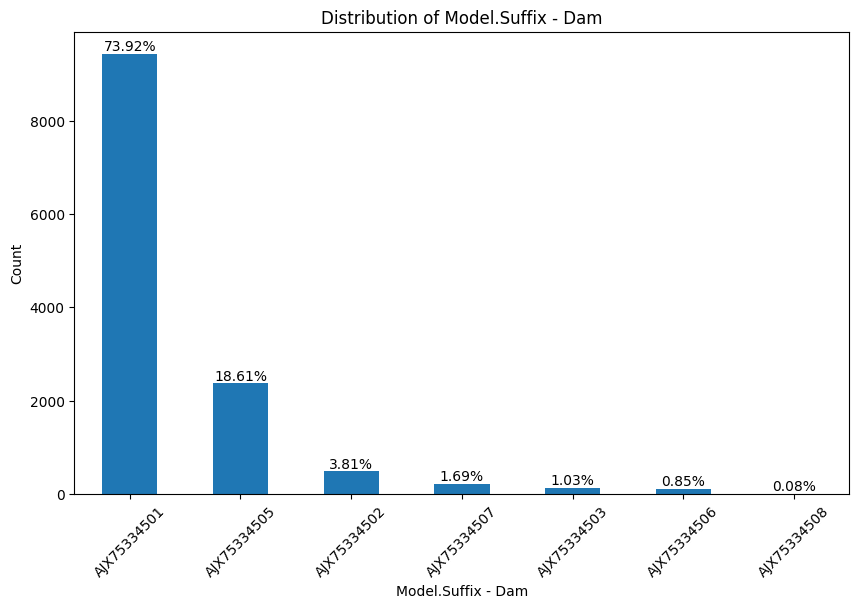

In [45]:
tmp_df = filtered_categorical_df[filtered_categorical_df.isnull().any(axis=1)]
model_suffix_dam_counts = tmp_df['Model.Suffix - Fill1'].value_counts()

plt.figure(figsize=(10, 6))
ax = model_suffix_dam_counts.plot(kind='bar')
plt.title('Distribution of Model.Suffix - Dam')
plt.xlabel('Model.Suffix - Dam')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add ratio labels to each bar
total = model_suffix_dam_counts.sum()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total:.2%}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom')
    
plt.show()

### 언더 샘플링

데이타 불균형을 해결하기 위해 언더 샘플링을 진행합니다.

In [ ]:
normal_ratio = 1.0  # 1.0 means 1:1 ratio

df_normal = df_merged[df_merged["target"] == "Normal"]
df_abnormal = df_merged[df_merged["target"] == "AbNormal"]

num_normal = len(df_normal)
num_abnormal = len(df_abnormal)
print(f"  Total: Normal: {num_normal}, AbNormal: {num_abnormal}")

df_normal = df_normal.sample(
    n=int(num_abnormal * normal_ratio), replace=False, random_state=RANDOM_STATE
)
df_concat = pd.concat([df_normal, df_abnormal], axis=0).reset_index(drop=True)
df_concat.value_counts("target")

### 데이터 분할

In [ ]:
df_concat = df_concat.sort_values(by=["Collect Date - Dam"])
df_train, df_val = train_test_split(
    df_concat,
    test_size=0.3,
    stratify=df_concat["target"],
    random_state=RANDOM_STATE,
)


def print_stats(df: pd.DataFrame):
    num_normal = len(df[df["target"] == "Normal"])
    num_abnormal = len(df[df["target"] == "AbNormal"])

    print(
        f"  Total: Normal: {num_normal}, AbNormal: {num_abnormal}"
        + f" ratio: {num_abnormal/num_normal}"
    )


# Print statistics
print(f"  \tAbnormal\tNormal")
print_stats(df_train)
print_stats(df_val)

## 3. 모델 학습

### 모델 정의 

In [ ]:
model = RandomForestClassifier(random_state=RANDOM_STATE)

### 모델 학습

In [ ]:
features = []

for col in df_train.columns:
    try:
        df_train[col] = df_train[col].astype(int)
        features.append(col)
    except:
        continue

if "Set ID" in features:
    features.remove("Set ID")

train_x = df_train[features]
train_y = df_train["target"]

model.fit(train_x, train_y)

## 4. 제출하기

### 테스트 데이터 예측

테스트 데이터 불러오기

In [ ]:
df_test_y = pd.read_csv(os.path.join("submission.csv"))

In [ ]:
df_test = pd.merge(X, df_test_y, "inner", on="Set ID")
df_test_x = df_test[features]

for col in df_test_x.columns:
    try:
        df_test_x.loc[:, col] = df_test_x[col].astype(int)
    except:
        continue

In [ ]:
test_pred = model.predict(df_test_x)
test_pred

### 제출 파일 작성

In [ ]:
# 제출 데이터 읽어오기 (df_test는 전처리된 데이터가 저장됨)
df_sub = pd.read_csv("submission.csv")
df_sub["target"] = test_pred

# 제출 파일 저장
df_sub.to_csv("submission.csv", index=False)

**우측 상단의 제출 버튼을 클릭해 결과를 확인하세요**